In [5]:
%matplotlib notebook 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [6]:
def indic(x,y,z):
    if x==y or x==z:
        return 1
    else :
        return 0
    

In [14]:
class Flock(object):
    """Represents the N-birds configuration at a given moment, in 2D. Birds are flocking in a square of side L
    with periodic boundary conditions. Birds' positions and velocities are contained in two arrays. 
    At t=0, these are pos0 and vel0.
    Birds flock will evolve at each time-step Dt"""
    
    def __init__(self,N,L,eta,v,r, Dt, pos0, vel0):
        """we choose L as a multiple of r in order to simplify"""
        self.positions = pos0
        self.velocities = vel0
        self.a = int(L/r)
        self.checkering = [[[] for i in range(self.a)] for j in range(self.a)]
        self.eta = eta
        self.v = v
        self.r = r 
        """the interaction radius"""
        self.L = L 
        """the scale of the flock"""
        self.N = N
        self.Dt=Dt
        self.localize_birds()
        
    def localize_birds(self):
        """compute the cell of each bird from its position and actualize self.checkering"""
        self.checkering = [[[] for i in range(self.a)] for j in range(self.a)]
        for k in range (self.N):
            i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
            self.checkering[i][j].append(k)
        
    
    def compute_new_velocity(self, k):
        """compute the new velocity bird number k will adopt, according to the velocity of its neighbours.
        Neighbours are necessary contained in the cell of bird number k and the eight cells around.
        For each of these potential neighbours, we have to check if they are within a circle of radius r around bird number k
        the interaction radius"""
        i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
        cos_avr = 0
        sin_avr = 0
        for p in range(-1,2):
            for q in range (-1,2):
                for bird in self.checkering[(i+p)%self.a][(j+q)%self.a]:
                    if (np.linalg.norm(self.positions[k]-(self.positions[bird]+np.array([indic(i+p,-1,self.a)*np.sign(i+p)*self.L, indic(i+q,-1,self.a)*np.sign(i+q)*self.L])))<self.r) : #check if birds are within a circle of radius r
                        cos_avr += self.velocities[bird,0]
                        sin_avr += self.velocities[bird,1]
        if cos_avr == 0 :
            theta=np.pi+np.sign(sin_avr)*(np.pi)/2
        else :
            theta=np.arctan(sin_avr/cos_avr)
            theta= theta +(1-np.sign(theta)*np.sign(sin_avr))*np.pi/2
        theta+=npr.uniform(-self.eta/2,self.eta/2)
        new_velocity = self.v*np.array([np.cos(theta),np.sin(theta)])
        return new_velocity
    
    def make_step(self):
        """compute the new velocities and positions that birds will get after the time-step,
        actualize self.positions, self.velocities and self.chekering"""
        new_velocities=np.zeros((self.N,2))
        new_positions=(self.positions).copy()
        for k in range(N):
            new_velocities[k]=self.compute_new_velocity(k)
            new_positions[k]+=(self.velocities[k]*self.Dt)
            new_positions[k]=new_positions[k]%self.L #%L for periodic boundary conditions
        self.positions = new_positions
        self.localize_birds()
        self.velocities=new_velocities
        
    def compute_avr_norm_velocity(self):
        """compute the average normalized velocity of birds in the flock at time t"""
        va = [0,0]
        for k in range (self.N):
            va+=self.velocities[k]
        return np.linalg.norm(va/(self.N*v))
    
            

<IPython.core.display.Javascript object>


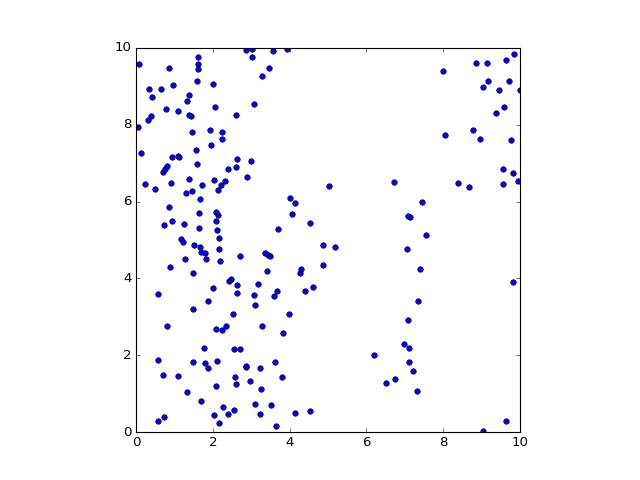

In [15]:
N=200
L=10
eta=0.1
v=0.1
r=1.
Dt=1.
#pos0=np.array([[5.,5.],[2.,3.],[3.,7.]])
pos0=npr.uniform(0,L,size=(N,2))
#vel0=np.array([[1.,0.],[0.5,0.],[1.,0.]])
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
line, = ax.plot([], [], 'bo', ms=5)
ax.set_xlim(0, fl.L)
ax.set_ylim(0, fl.L)

def make_frame(t):
    fl.make_step()
    x = fl.positions[:,0]
    y = fl.positions[:,1]
    line.set_data(x, y)
    return line,
animation.FuncAnimation(fig, make_frame, interval=20, blit=False)

In [ ]:
"""

def flock_to_image(flock):
    fig = plt.figure()    
    plt.axis([0,flock.L,flock.L,0])
    #im=plt.quiver(flock.positions[:,0],flock.positions[:,1],flock.velocities[:,0],flock.velocities[:,1], alpha=.5)
    im=plt.quiver([],[],[],[], alpha=.5)
    def make_frame(t):
        flock.make_step()
        x = flock.positions[:,0]
        y = flock.positions[:,1]
        vx = flock.velocities[:,0]
        vy = flock.velocities[:,1]
        im.set_data(x, y, vx, vy)
        return im
animation.FuncAnimation(fig, make_frame, interval=20, blit=False)
"""

In [ ]:
"""N=100
L=10
eta=0.1
v=1
r=0.5
Dt=1
#pos0=np.array([[5.,5.],[2.,3.],[3.,7.]])
pos0=npr.uniform(0,L,size=(N,2))
#vel0=np.array([[1.,0.],[0.5,0.],[1.,0.]])
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)
flock_to_image(fl)"""

<IPython.core.display.Javascript object>


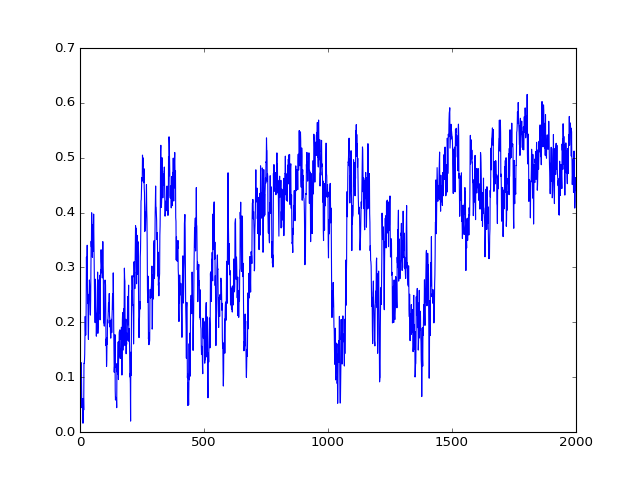

In [30]:
def flock_to_image(flock):  
    plt.figure()
    plt.axis([0,flock.L,flock.L,0])
    plt.quiver(flock.positions[:,0],flock.positions[:,1],flock.velocities[:,0],flock.velocities[:,1], alpha=.5)
    plt.show()

    
N=200
L=10
eta=np.pi
v=0.1
r=1.
Dt=1.
#pos0=np.array([[5.,5.],[2.,3.],[3.,7.]])
pos0=npr.uniform(0,L,size=(N,2))
#vel0=np.array([[1.,0.],[0.5,0.],[1.,0.]])
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl2=Flock(N,L,eta,v,r, Dt, pos0, vel0)
L=[]
T=[]
t=0
for i in range(2000):
    T.append(t)
    fl2.make_step()
    L.append(fl2.compute_avr_norm_velocity())
    t+=1

plt.figure()
plt.plot(T,L)




In [ ]:
Dt=1.
v=0.1
r=1.
N=300
L=10.
eta = 0.5

def generate_random_flock(N, L, eta, v, r, Dt):
    pos0=npr.uniform(0,L,size=(N,2))
    theta = npr.uniform(0.,2*np.pi,N)
    vel0=np.zeros((N,2))
    vel0[:,0]=v*np.cos(theta)
    vel0[:,1]=v*np.sin(theta)
    fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)
    return fl


    
def noise_influence():
    eta =0
    noise_influence = open("noise_influence.txt","w")
    for i in range (50):
        va = 0
        var = 0
        for n in range (5):
            fl = generate_random_flock(N, L, eta, v, r, Dt)
            for k in range(150):
                fl.make_step()
            va+=fl.compute_avr_norm_velocity()
            var+=(fl.compute_avr_norm_velocity())**2
        va/=5
        sigma= np.sqrt((var/5)-(va)**2)
        eta+=0.1
        noise_influence.write("\n" +str(eta)+" "+str(va)+" "+str(sigma))
    noise_influence.close()  
    
noise_influence()


"""def density_influence():
    N = 20
    L=20
    eta = 0.5
    density_influence = open("density_influence.txt","w")
    for i in range (20):
        va = 0
        var = 0
        for n in range (5):
            fl = generate_random_flock(N, L, eta, v, r, Dt)
            for k in range(3000):
                fl.make_step()
            va+=fl.compute_avr_norm_velocity()
            var+=(fl.compute_avr_norm_velocity())**2
        va/=fl.N
        sigma= sqrt((var/fl.N)-(va)**2)
        N+=20
        density_influence.write("\n" +str(N/L**2)+" "+str(va)+" "+str(sigma))
    for i in range (4):
        va = 0
        var = 0
        for n in range (5):
            fl = generate_random_flock(N, L, eta, v, r, Dt)
            for k in range(3000):
                fl.make_step()
            va+=fl.compute_avr_norm_velocity()
            var+=(fl.compute_avr_norm_velocity())**2
        va/=fl.N
        sigma= np.sqrt((var/fl.N)-(va)**2)
        N+=200
        density_influence.write("\n" +str(N/L**2)+" "+str(va)+" "+str(sigma))
    density_influence.close()

density_influence()"""

Noise = []
V_n = []
Sigma_n = []

with open("noise_influence.txt","r") as f :
    data= f.readlines()
    for line in data :
        words = line.split()
        Noise.append(float(words[0]))
        V.append(float(words[1]))
        Sigma.append(float(words[2]))
        
Rho = []
V_rho = []
Sigma_rho = []

"""with open("density_influence.txt","r") as f :
    data= f.readlines()
    for line in data :
        words = line.split()
        Rho.append(float(words[0]))
        V_rho.append(float(words[1]))
        Sigma_rho.append(float(words[2]))"""
        
        
noise_fig = plt.figure()
plt.errorbar(Noise, V_n, yerr=Sigma_n, fmt='o')
plt.title('Noise influence on v_a')

"""density_fig = plt.figure()
plt.errorbar(Rho, V_rho, yerr=Sigma_rho, fmt='o')
plt.title('Density influence on v_a')"""


            
            

In [ ]:
theta = npr.uniform(0.,2*np.pi,3)
vel0=np.zeros((3,2))
vel0[:,0]=np.cos(theta)
vel0[:,1]=np.sin(theta)
print (vel0)
print("pos",npr.uniform(0,L,size=(2,3)))


In [16]:
x=1
#Creation et ecriture:
mon_flux=open("my_data.txt","w") #w=write mon_flux.write(str(x))
#Ecriture a la fin d’un fichier existant: mon_flux=open("my_data.txt","a") #a=append
mon_flux.write("\n"+str(x+1)) 
mon_flux.write("\n"+str(x+2)) 
#Lecture: mon_flux=open("my_data.txt","r") #r=read
mon_flux.close()
mon_flux = open ("my_data.txt","r")
y=mon_flux.read()
print(y)



2
3


<IPython.core.display.Javascript object>


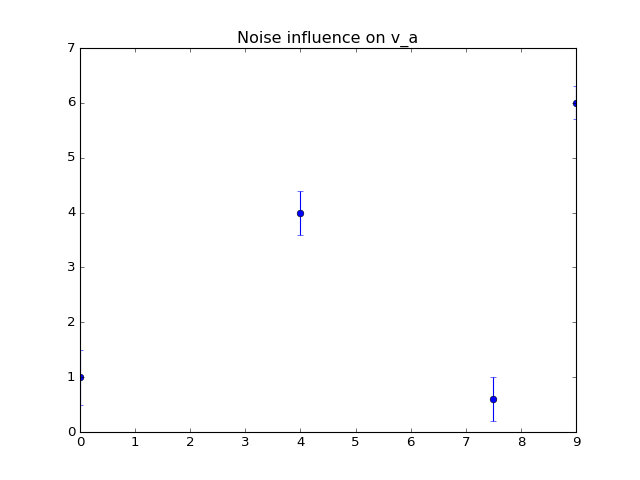

In [28]:
A=[0,4,9,7.5]
B=[1,4,6,0.6]
C=[0.5,0.4,0.3,0.4]

fig = plt.figure()
plt.errorbar(A, B, yerr=C, fmt='o')
plt.title('Noise influence on v_a')


In [20]:
str(24/3)


'8.0'

In [19]:
str(0.78)+ " " +str(5.6)

'0.78 5.6'

In [10]:
A= np.array([[9,7],[4,1]])
print (A)
print (A[0,0])
print(A[0,:])
print(A[:,1])
print(A[0][0])

[[9 7]
 [4 1]]
9
[9 7]
[7 1]
9
